In [ ]:
#### PRCP- Shubham Kumar

## HeartDieseasePred


##  Description: 
 ●	Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31%
    of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people 
    under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible
    heart disease.
    
●	People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension,
    diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Domain: Healthcare


###  Domain Analysis:  

#### There are 13 columns in the lables dataset, where the patient_id column is a unique and random identifier and all features are described in the section below.
#### slope_of_peak_exercise_st_segment (type: int):
             the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
#### thal (type: categorical): 
             results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
#### resting_blood_pressure (type: int): 
            resting blood pressure
#### chest_pain_type (type: int): 
           chest pain type (4 values)
#### num_major_vessels (type: int): 
          number of major vessels (0-3) colored by flourosopy          
#### fasting_blood_sugar_gt_120_mg_per_dl (type: binary): 
        fasting blood sugar > 120 mg/dl
#### resting_ekg_results (type: int): 
        resting electrocardiographic results (values 0,1,2)
#### serum_cholesterol_mg_per_dl (type: int): 
      serum cholestoral in mg/dl
#### oldpeak_eq_st_depression (type: float): 
       oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
#### sex (type: binary): 
       0: female, 1: male
#### age (type: int): 
       age in years

#### Exploration of dataset
The attributes of the dataset utilized (risk factors of heart attack) are discussed below:

####  Age (age): 
This is a highly crucial risk factor for the occurrence of heart attacks because the risk of getting heart attacks can double as 
age increases. In adults, the fatty streaks indicative of coronary artery disease starts to develop and it is proven that more than 80% cases of
heart attacks due to coronary heart disease are in patients aged 65 or above.

####  Sex (sex):
It has been proven that there is a higher risk of heart attack in men compared to women aged 50 or less.17 After the menopause in women, 
there is a debate of equal risk of heart attack in both men and women. The disease of diabetes in women increases the risk of a heart attack.

####  Chest pain (cp): 
This happens when the muscle of the heart doesn’t get enough blood with oxygen and is called angina. The feeling of squeezing or
high pressure builds up in the chest and an uncomfortable feeling in shoulder, jaw, back, or neck can also develop along with the feeling 
of indigestion in angina. The pain can be felt in the hands. Different types of Angina include stable angina, pectoris, unstable angina, 
prinzmetal angina, and microvascular angina.

####  Blood pressure ():
Arteries can be affected by high blood pressure. This can occur because of different reasons like imbalanced cholesterol,
high sugar, obesity etc. which can enhance the risks.

####  Cholesterol (chol):
Arteries again can get affected due to imbalanced or bad cholesterol. It narrows the arteries especially the low-density 
lipo-protein cholesterol. Another cause is the blood fat i.e., triglycerides with high levels of cholesterol which can also enhance the risk of
heart attacks. So, it is advisable to maintain good cholesterol to lower the risk of a heart attack.

####  Fasting blood sugar (fbs):
High blood sugar can become a cause of a heart attack. It may happen due to lower hormone production by the pancreas 
or no response to insulin in the body.

####  Resting Electrocardiographic (restecg):
For medium to high risk of heart attack, the present scenario is not sufficient to understand the screening
disadvantages. For those having less risk of disease, the screening harmful effects including a rash or irritation on skin can balance up with exercise.

####  Heart rate (thalach):
The increase in the heart rate with the enhanced risk of heart disease is being parallelized with risk increment with 
blood pressure enhancement.23It is proven in research25that if the heart rate increases by 10 bpm, then the chances of cardiac death increase by 20%.
This is also the same with the enhancement in the blood pressure of 10 mm Hg.

####  Angina (exng):
The discomfort from Angina which is an Exercise-induced makes the person feel gripped, squeezed and tight which can carry
from mild toserious. The pain is usually felt in the chest’s center and it can spread up in the shoulders, back, jaw, arm or neck. Angina plays 
a crucial role in identifying coronary disease which makes it worthwhile to consider it a separate category for analysis.

####  Thalium Stress Test (thal): 
Duration of the segment is very important because it needs to be checked that after peak stress, 
the recovery is happening constantly or not with a positive treadmill test. The abnormal values come under the downslope of depression 
with less than or equal to 1 mm with 60 to 80 ms. The equivocal tests i.e., with up-sloping segments are also there in the exercise.



#### Aim of the project :
                        * our aim is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease.
                        •	0 represents no heart disease present
                        •	1 represents heart disease present

#### Importing the Essential libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


#### Importing and understanding our dataset


In [2]:
# as we have given two dataset labels and values
data1 = pd.read_csv(r"D:\Heart_Diesease_Prediction_Project\PRCP-1016-HeartDieseasePred\Data\values.csv")
data1

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [3]:
data2 = pd.read_csv(r"D:\Heart_Diesease_Prediction_Project\PRCP-1016-HeartDieseasePred\Data\labels.csv")
data2


,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [4]:
#### add both the files data1 and data2 using concat function with column-wise and stored in data as final dataset 

In [5]:
df = pd.concat([data1,data2["heart_disease_present"]], axis = 1)
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [6]:
#### Verifying it as a 'dataframe' object in panda

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
#### Shape of dfset

In [9]:
df.shape

(180, 15)

In [10]:
df.head(10)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
7,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1
8,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,1
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0,0


### Basic Checks:


In [11]:
#### Checking whether null values present or not

In [12]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [13]:
df.duplicated().sum()

0

#### Description

In [14]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [15]:
df.describe(include=['O']) # to describe the categorical values

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [17]:
####Analysing the 'target' variable
df["heart_disease_present"].describe()


count    180.000000
mean       0.444444
std        0.498290
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: heart_disease_present, dtype: float64

In [18]:
df["heart_disease_present"].unique()

array([0, 1], dtype=int64)

#### Clearly, this is a classification problem, with the heart_disease_present variable having values '0' and '1'

# Exploratory df Analysis (EDA)


# Univariate Analysis


**Univariate analysis involves examining and interpreting one variable at a time, without considering the relationships or influences from other variables.** 

***This analytical approach is foundational in statistics and data analysis, aiding in the exploration of individual variable characteristics and distributions.***


In [19]:
!pip install sweetviz

In [20]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(df)#syntax to use sweetviz
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insights from the Univariate Analysis


* People having slope_of_peak_exercise_st_segment 1 and 2 contribute towards 94% of the data.
* people in thal containing normal and reversed defect contribute 95% of the data.
* resting blood pressure of the majority of the group lies in between 120 - 140.
* people with chest pain 4 are high in count 46%.
* people having 0 number of major vessel are high in number 59%.
* people with blood sugar < 120 are high is count 84%, rest have blood sugar > 120.
* resting EKG results people with 2 and 0 are approx equal.
* majority of the people have cholesterol between 200 - 300 mg per dl.
* people with no depression are the highest with 31%.
* people with age between 44 - 58 are the highest.
* max heart rate achieved lies between 142 - 162.
    

# Bivaritate Analysis 

#### Bivariate analysis involves the analysis of two variables simultaneously to understand the relationship between them.

#### In simply ,checking the variation of the variable with the target variable

In [21]:
df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

heart_disease_present
0    100
1     80
Name: count, dtype: int64


<Axes: xlabel='heart_disease_present', ylabel='count'>

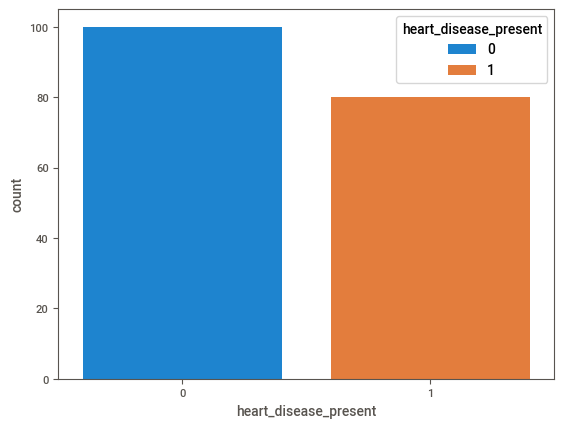

In [22]:
target = df['heart_disease_present'].value_counts()
print(target)
sns.countplot(x='heart_disease_present', data=df, hue='heart_disease_present')

In [23]:
print("Percentage of patience without heart problems: "+str(round(target[0]*100/180,2)))
print("Percentage of patience with heart problems: "+str(round(target[1]*100/180,2)))

Percentage of patience without heart problems: 55.56
Percentage of patience with heart problems: 44.44


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [25]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [26]:
### As the dataframe have column "patient_id" which is unneccassary to analyse, so we drop the column patient_id

In [27]:
df.drop(columns = ["patient_id"], inplace = True)
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [28]:
#### Analysing the slope_of_peak_exercise_st_segment 

In [29]:
d1=df['slope_of_peak_exercise_st_segment'].unique()


heart_disease_present
0    100
1     80
Name: count, dtype: int64


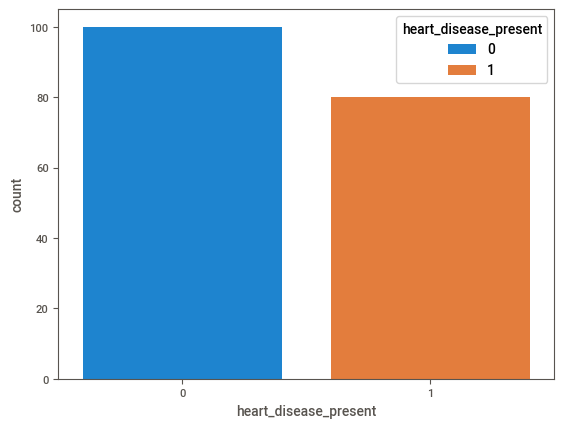

In [30]:
target = df["heart_disease_present"]

sns.countplot(x= target, hue=target)


target_temp = df.heart_disease_present.value_counts()

print(target_temp)

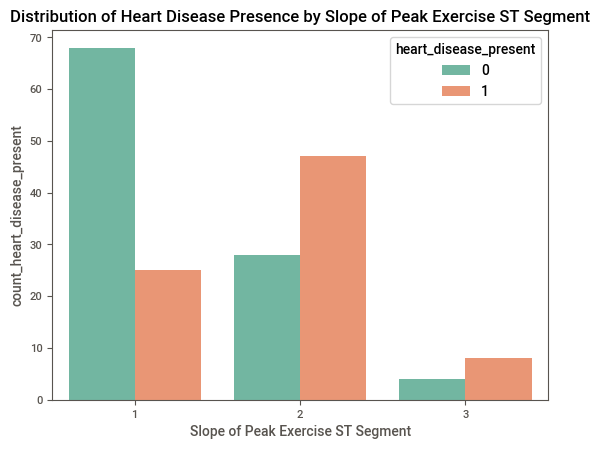

In [31]:
sns.countplot(
    x='slope_of_peak_exercise_st_segment', 
    hue='heart_disease_present', 
    data=df,
    palette='Set2'  # Optional: You can choose a palette for coloring
)
plt.xlabel('Slope of Peak Exercise ST Segment')
plt.ylabel('count_heart_disease_present')
plt.title('Distribution of Heart Disease Presence by Slope of Peak Exercise ST Segment')
plt.show()

In [32]:
bins = [90, 120, 140, 160, 180]
labels = ['90-120', '121-140', '141-160', '161-180']

# Create the 'blood_pressure_range' column
df['blood_pressure_range'] = pd.cut(df['resting_blood_pressure'], bins=bins, labels=labels, right=True)

# Display the DataFrame with the new column
grouped_df = df.groupby('blood_pressure_range')['heart_disease_present'].sum().reset_index()

# Display the grouped data
print(grouped_df)

  blood_pressure_range  heart_disease_present
0               90-120                     22
1              121-140                     39
2              141-160                     15
3              161-180                      4


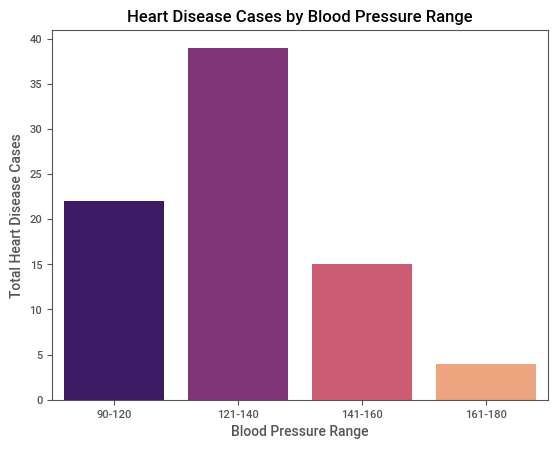

In [33]:
sns.barplot(x='blood_pressure_range', y='heart_disease_present', data=grouped_df, palette="magma")

# Adding labels and title
plt.xlabel('Blood Pressure Range')
plt.ylabel('Total Heart Disease Cases')
plt.title('Heart Disease Cases by Blood Pressure Range')

# Display the plot
plt.show()

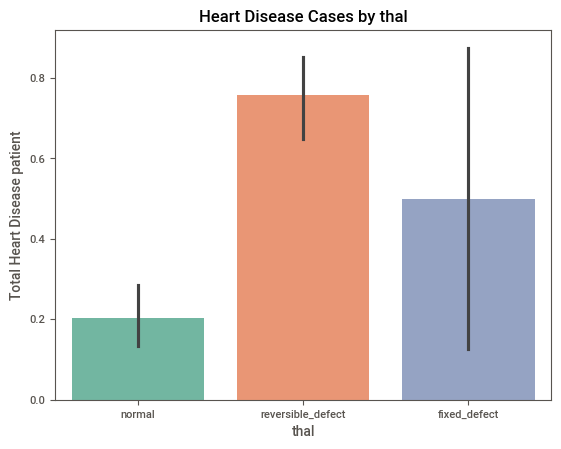

In [34]:
sns.barplot(x='thal', y='heart_disease_present', data=df, palette='Set2')

# Adding labels and title
plt.xlabel('thal')
plt.ylabel('Total Heart Disease patient')
plt.title('Heart Disease Cases by thal')

# Display the plot
plt.show()


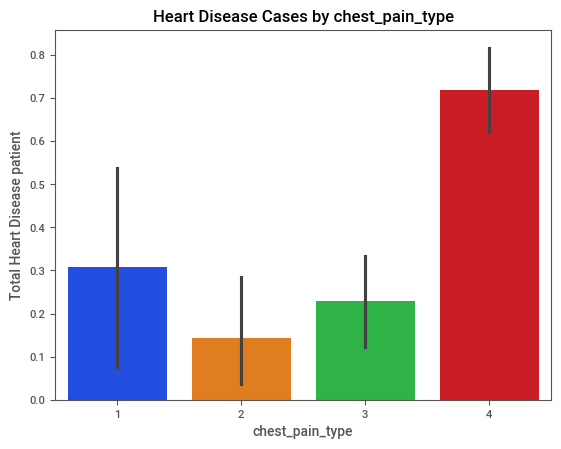

In [35]:
sns.barplot(x='chest_pain_type', y='heart_disease_present', data=df, palette='bright')

# Adding labels and title
plt.xlabel('chest_pain_type')
plt.ylabel('Total Heart Disease patient')
plt.title('Heart Disease Cases by chest_pain_type')

# Display the plot
plt.show()

In [36]:
df.groupby('num_major_vessels')['heart_disease_present'].sum()

num_major_vessels
0    29
1    22
2    17
3    12
Name: heart_disease_present, dtype: int64

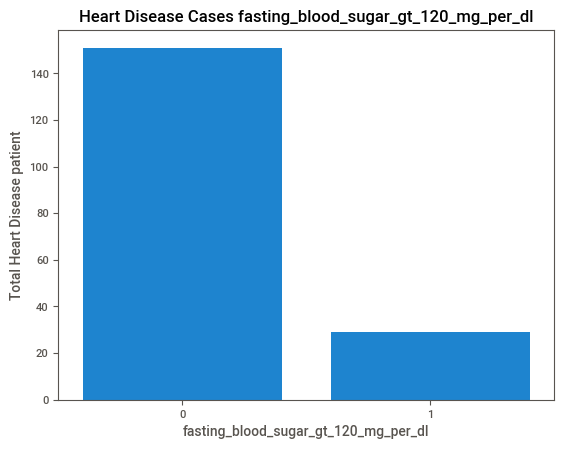

In [37]:
sns.countplot(x='fasting_blood_sugar_gt_120_mg_per_dl',data = df)

# Adding labels and title
plt.xlabel('fasting_blood_sugar_gt_120_mg_per_dl')
plt.ylabel('Total Heart Disease patient')
plt.title('Heart Disease Cases fasting_blood_sugar_gt_120_mg_per_dl')

# Display the plot
plt.show()

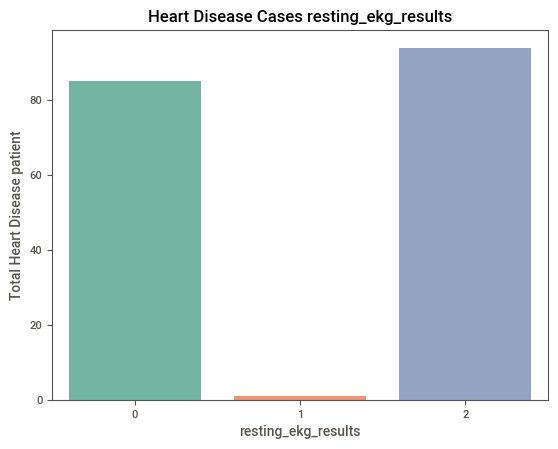

In [38]:
sns.countplot(x='resting_ekg_results', data=df, palette='Set2')

# Adding labels and title
plt.xlabel('resting_ekg_results')
plt.ylabel('Total Heart Disease patient')
plt.title('Heart Disease Cases resting_ekg_results')

# Display the plot
plt.show()

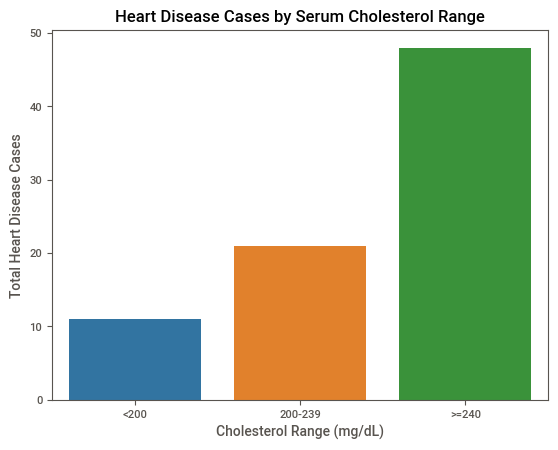

In [39]:
# Define the cholesterol level bins
cholesterol_bins = [0, 199, 239, 500]  # You can adjust the upper limit based on your data
cholesterol_labels = ['<200', '200-239', '>=240']

# Categorize cholesterol levels into these bins
df['cholesterol_range'] = pd.cut(df['serum_cholesterol_mg_per_dl'], bins=cholesterol_bins, labels=cholesterol_labels, right=True)

# Group by cholesterol range and sum the heart disease occurrences
grouped_cholesterol = df.groupby('cholesterol_range')['heart_disease_present'].sum().reset_index()

#Plotting the bar plot
sns.barplot(x='cholesterol_range', y='heart_disease_present', data=grouped_cholesterol, palette='tab10')



# Adding labels and title
plt.xlabel('Cholesterol Range (mg/dL)')
plt.ylabel('Total Heart Disease Cases')
plt.title('Heart Disease Cases by Serum Cholesterol Range')

# Display the plot
plt.show()

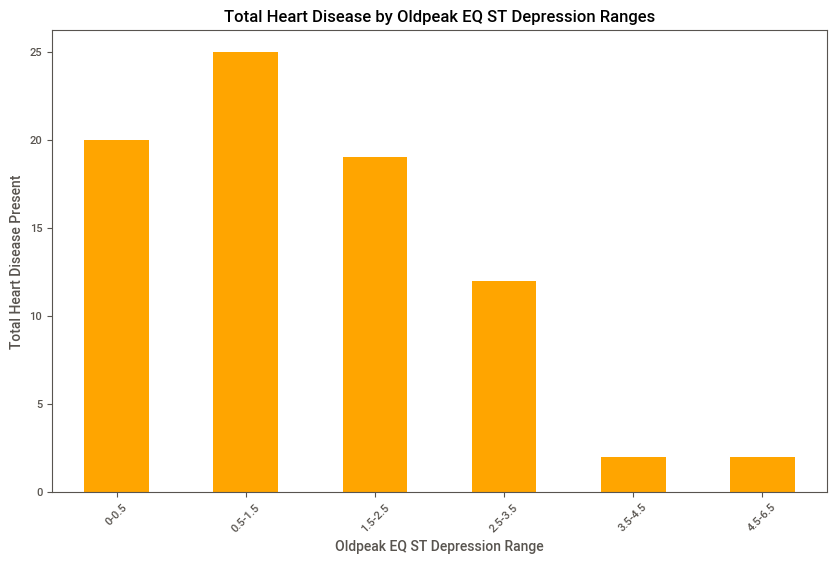

In [40]:
bins = [0, 0.5, 1.5, 2.5, 3.5, 4.5, 6.5]
labels = ['0-0.5', '0.5-1.5', '1.5-2.5', '2.5-3.5', '3.5-4.5', '4.5-6.5']
df['range'] = pd.cut(df['oldpeak_eq_st_depression'], bins=bins, labels=labels, right=False)

# Aggregate data
summary = df.groupby(['range'])['heart_disease_present'].sum().reindex(labels)

# Plot
plt.figure(figsize=(10, 6))
summary.plot(kind='bar',color='orange')
plt.xlabel('Oldpeak EQ ST Depression Range')
plt.ylabel('Total Heart Disease Present')
plt.title('Total Heart Disease by Oldpeak EQ ST Depression Ranges')
plt.xticks(rotation=45)

plt.show()

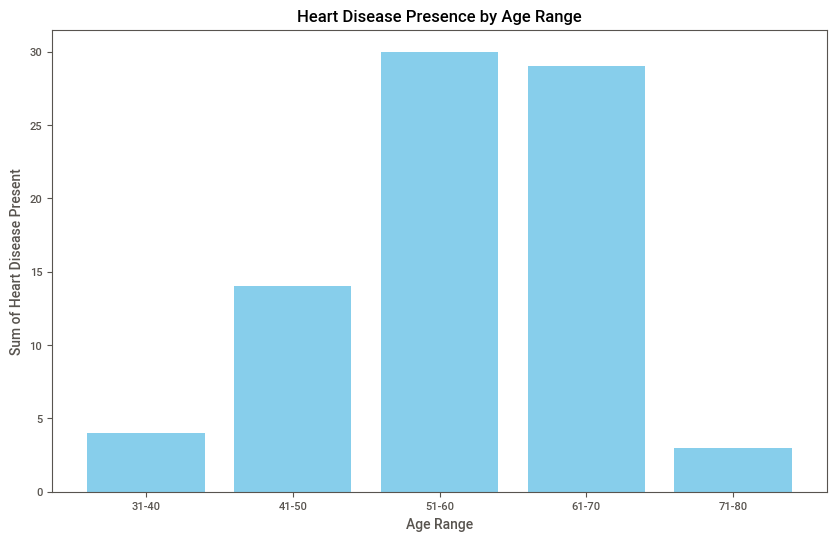

In [41]:
age_bins = [ 30, 40, 50, 60, 70, 80]
age_labels = ['31-40', '41-50', '51-60', '61-70', '71-80']

# Assign ages to bins
df['age_range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Sum heart disease cases within each age range
age_range_summary = df.groupby('age_range')['heart_disease_present'].sum().reset_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_range_summary['age_range'], age_range_summary['heart_disease_present'], color='skyblue')
plt.xlabel('Age Range')
plt.ylabel('Sum of Heart Disease Present')
plt.title('Heart Disease Presence by Age Range')
plt.show()


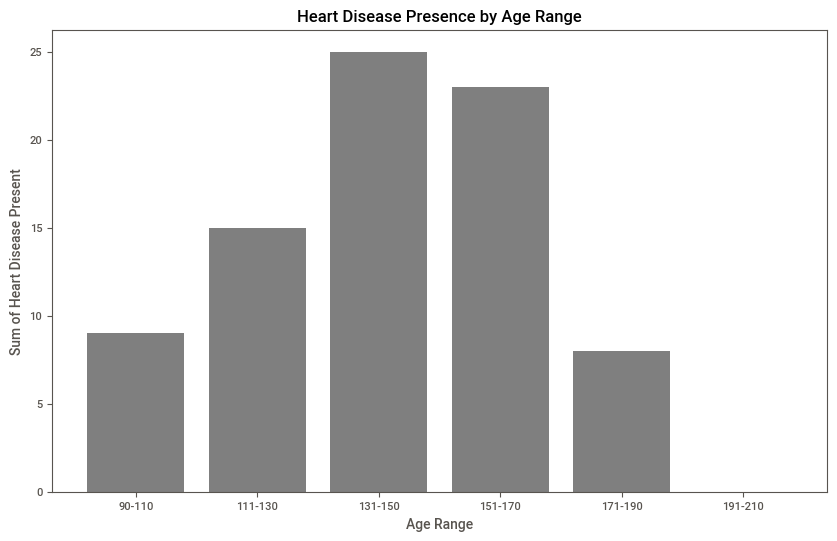

In [42]:
hr_bins = [90, 110, 130, 150, 170, 190, 210]
hr_labels = ['90-110', '111-130', '131-150', '151-170', '171-190', '191-210']


df['hr_range'] = pd.cut(df['max_heart_rate_achieved'], bins=hr_bins, labels=hr_labels, right=False)

# Sum heart disease cases within each age range
hr_range = df.groupby('hr_range')['heart_disease_present'].sum().reset_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(hr_range['hr_range'], hr_range['heart_disease_present'], color='#7f7f7f')
plt.xlabel('Age Range')
plt.ylabel('Sum of Heart Disease Present')
plt.title('Heart Disease Presence by Age Range')
plt.show()


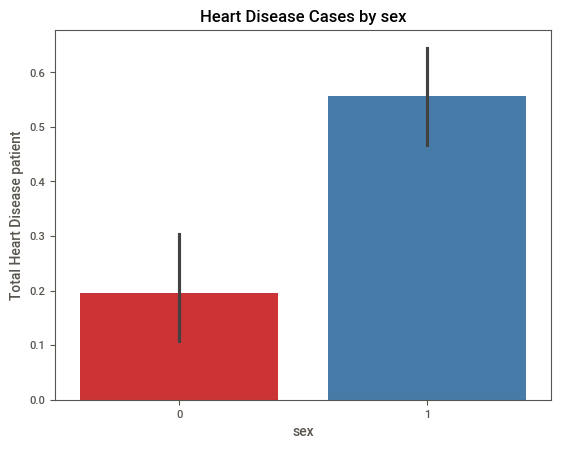

sex
0    11
1    69
Name: heart_disease_present, dtype: int64

In [43]:
sns.barplot(x='sex', y='heart_disease_present', data=df, palette='Set1')

# Adding labels and title
plt.xlabel('sex')
plt.ylabel('Total Heart Disease patient')
plt.title('Heart Disease Cases by sex')

# Display the plot
plt.show()
df.groupby('sex')['heart_disease_present'].sum()



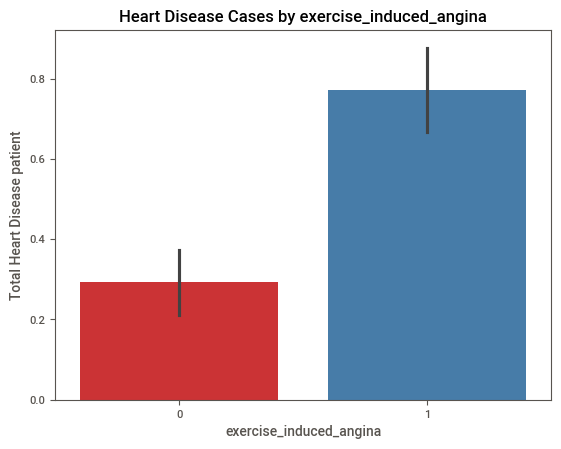

exercise_induced_angina
0    36
1    44
Name: heart_disease_present, dtype: int64

In [44]:
sns.barplot(x='exercise_induced_angina', y='heart_disease_present', data=df, palette='Set1')

# Adding labels and title
plt.xlabel('exercise_induced_angina')
plt.ylabel('Total Heart Disease patient')
plt.title('Heart Disease Cases by exercise_induced_angina')

# Display the plot
plt.show()
df.groupby('exercise_induced_angina')['heart_disease_present'].sum()


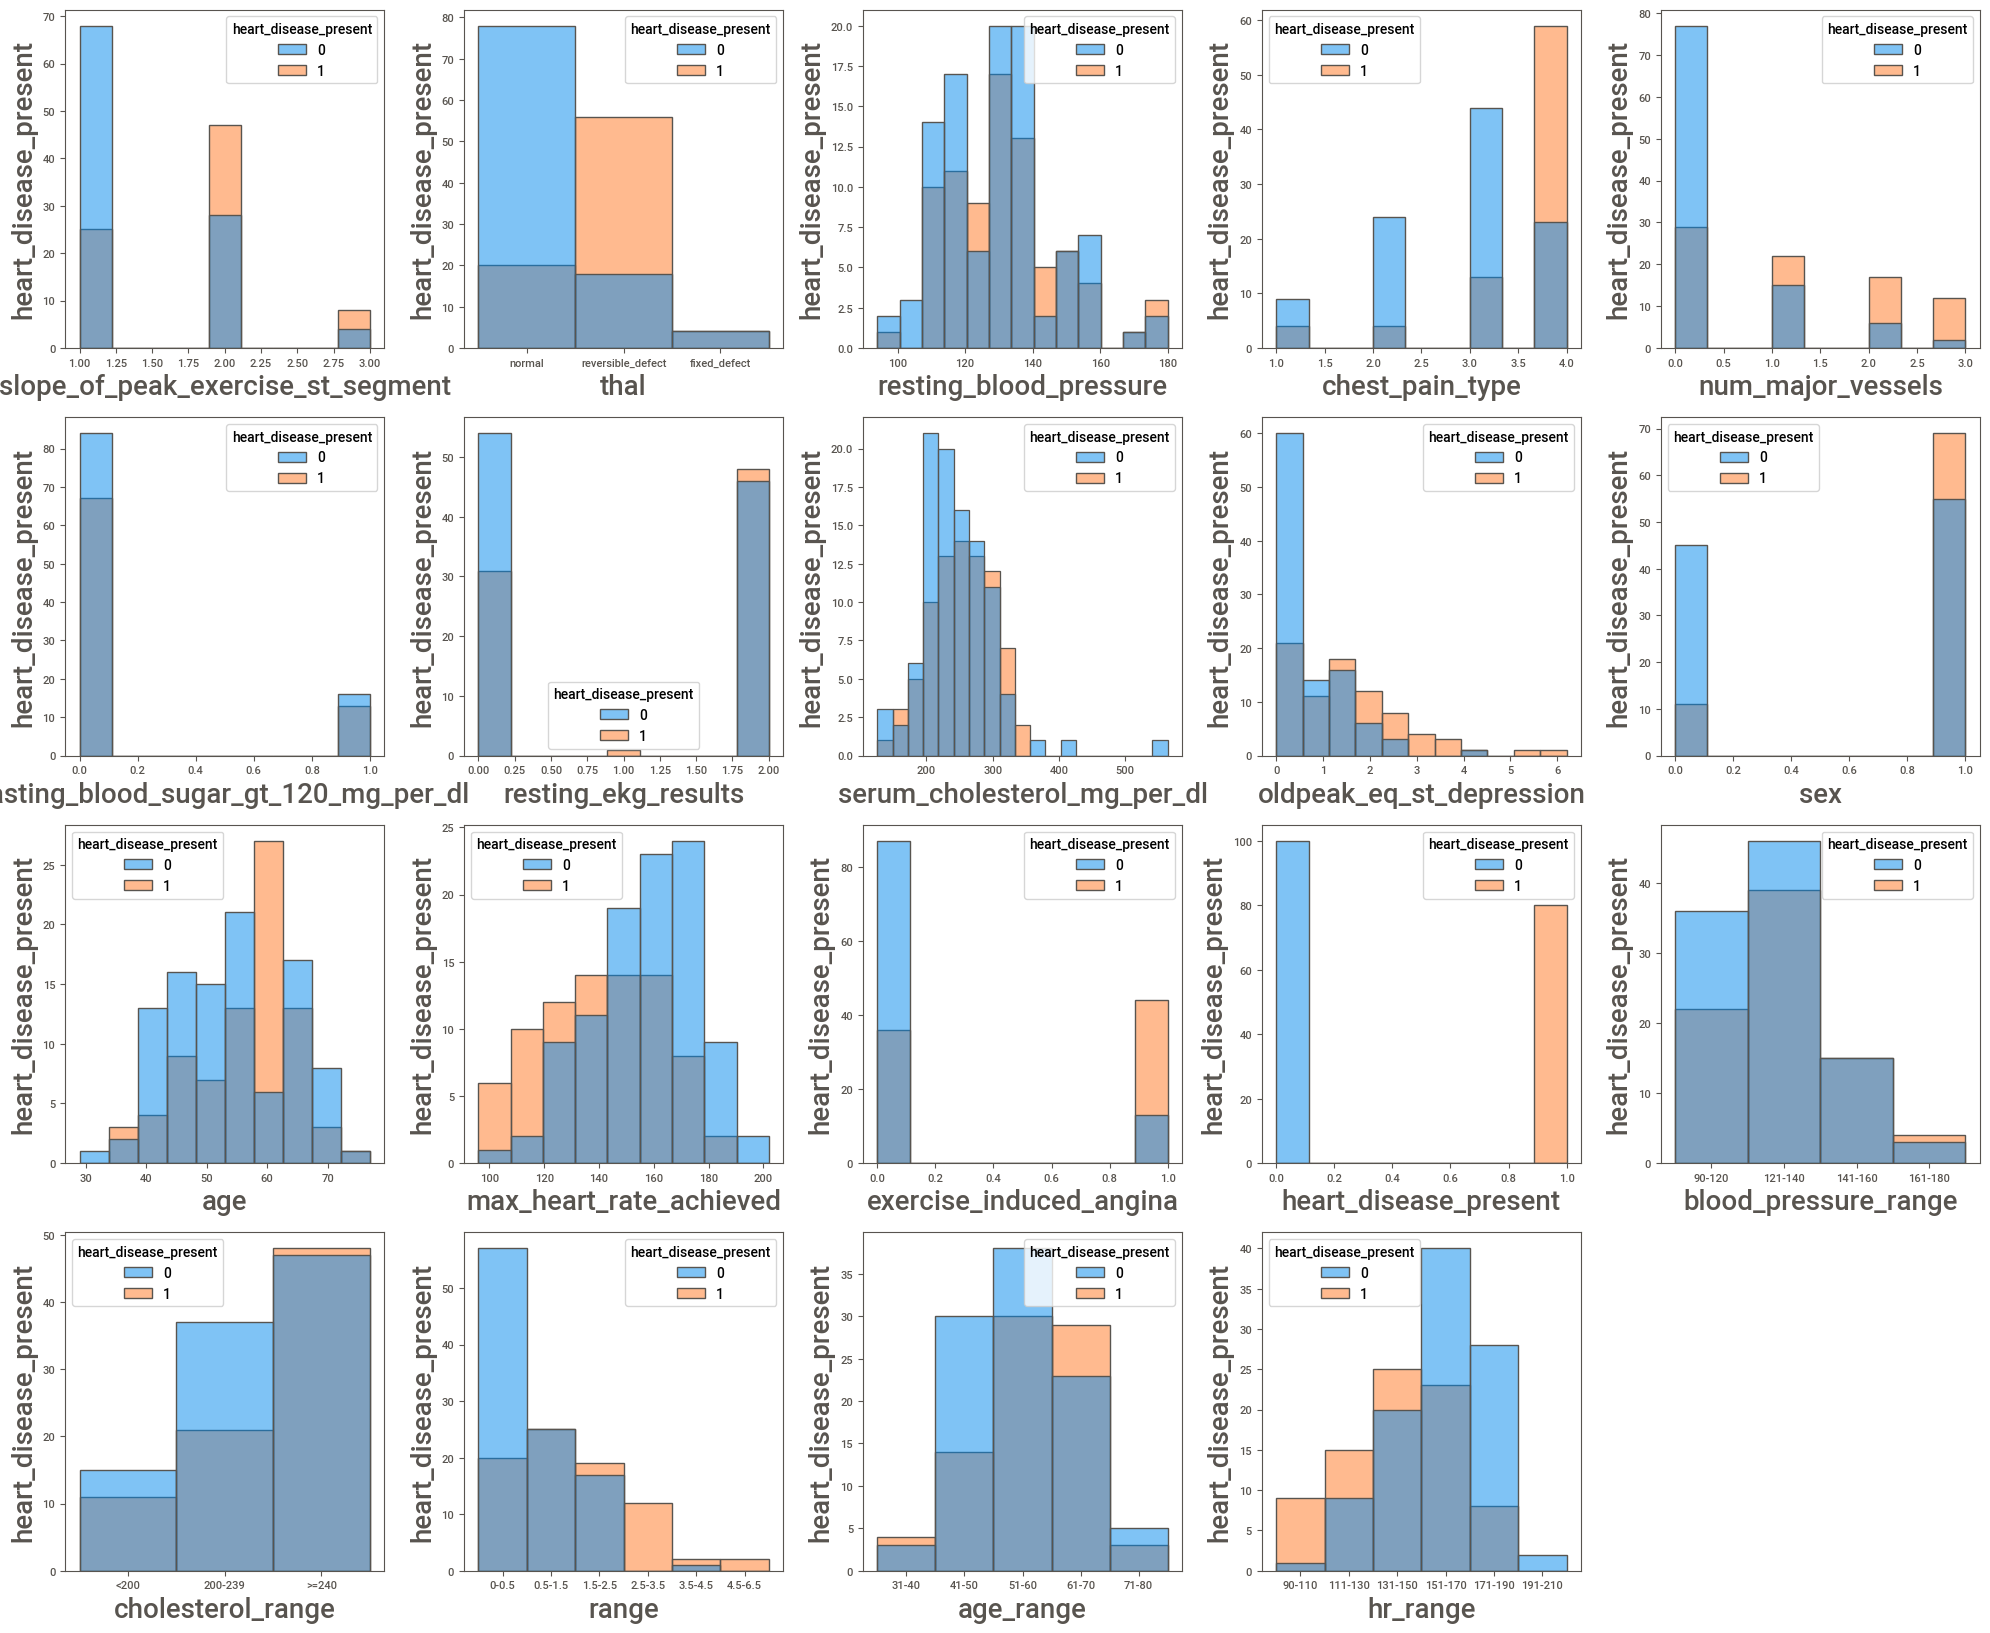

In [45]:
plotnumber = 1
plt.figure(figsize=(20, 20))
for column in df:
    ax = plt.subplot(5, 5, plotnumber)
    sns.histplot(x=df[column].dropna(axis=0), hue=df['heart_disease_present'])
    plt.xlabel(column, fontsize=20)
    plt.ylabel('heart_disease_present', fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

### Insights from Bivariate analysis
* We observe that, heart attack is more prone to slope_of_peak_exercise_st_segment have 2, than Slope '0' and '1'
* In thal,patient have more chance of heart attack in reversible defect
* We notice, that chest pain of '4', i.e. the ones with typical angina are much less likely to have heart problems patients
* number of major vessel is common for all
* people having fasting blood sugar < 120 are more prone to getting heart attack
* ca=4 has astonishingly large number of heart patients
* resting_ekg_results having 2 is more prune to heart attack
* oldpeak_eq_st_depression have 0 get heart attack faster
* count of men having heart disease are more compared to women
* People with exang=1 i.e. Exercise induced angina are much likely to have heart problems

## Data Preprocessing


In [46]:
## Checking whether null or missing value present in data
df.isnull().sum()
df.isna().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
blood_pressure_range                    0
cholesterol_range                       1
range                                   0
age_range                               1
hr_range                                0
dtype: int64

In [47]:
## as there is no missing or null value present we can go for next steps

In [48]:
from sklearn.preprocessing import LabelEncoder

# Define label encoder
# label encoding is a technique used in df preprocessing to convert categorical variables into numerical format
label_encoder = LabelEncoder()

df["thal"].value_counts()

df["thal"] = label_encoder.fit_transform(df["thal"])
print(df["thal"].value_counts())


thal
1    98
2    74
0     8
Name: count, dtype: int64


In [49]:
# drop the unnecessary col 
pd.set_option('display.max_rows',200)
df
df.drop(columns = ['blood_pressure_range','cholesterol_range','range','age_range','hr_range','fasting_blood_sugar_gt_120_mg_per_dl'],inplace=True)


In [50]:
##Finding out the correlation between the columns 

heart_disease_present                1.000000
exercise_induced_angina              0.448647
thal                                 0.447214
num_major_vessels                    0.421519
chest_pain_type                      0.412829
oldpeak_eq_st_depression             0.382930
max_heart_rate_achieved              0.375352
slope_of_peak_exercise_st_segment    0.344224
sex                                  0.335421
resting_ekg_results                  0.145933
age                                  0.138255
serum_cholesterol_mg_per_dl          0.079775
resting_blood_pressure               0.078506
Name: heart_disease_present, dtype: float64


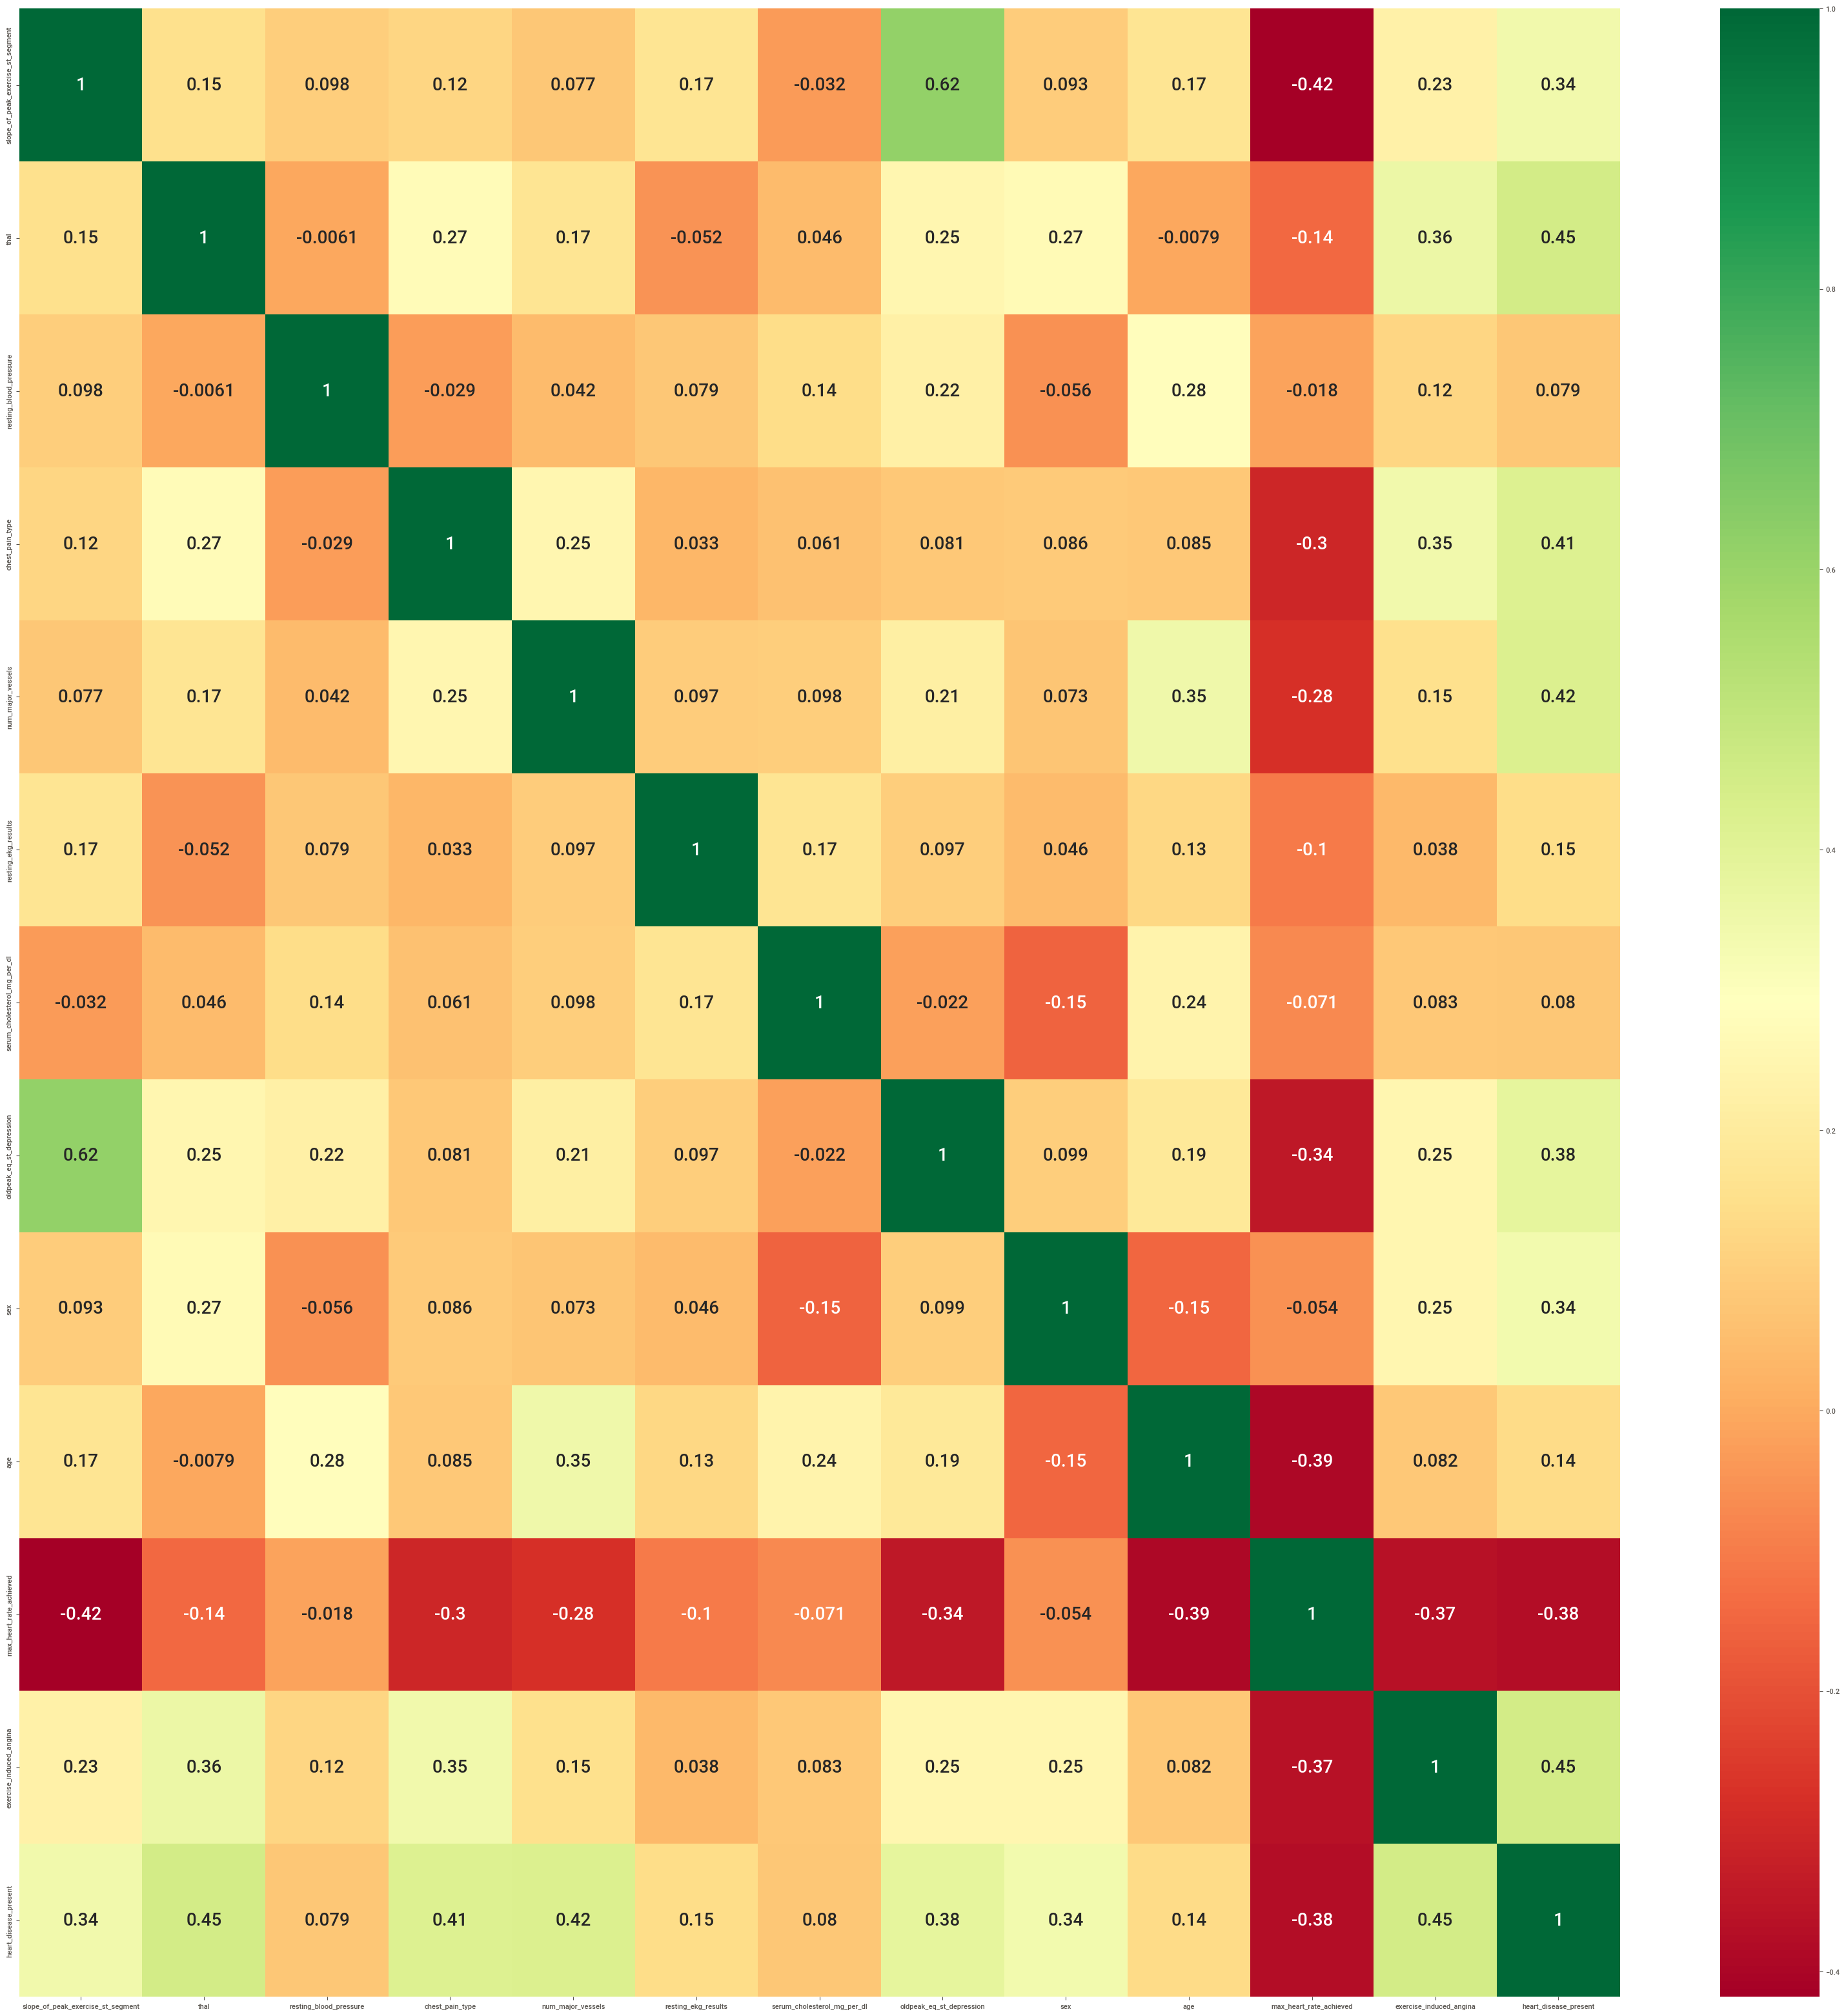

In [51]:
plt.figure(figsize=(40, 40))  # canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":20})
print(df.corr()["heart_disease_present"].abs().sort_values(ascending=False))

This shows that most columns are moderately correlated with heart_disease_present, but'serum_cholesterol_mg_per_dl,
resting_blood_pressur ' is very weakly correlated.

In [52]:
#### Finding outliers in the data present through boxplot


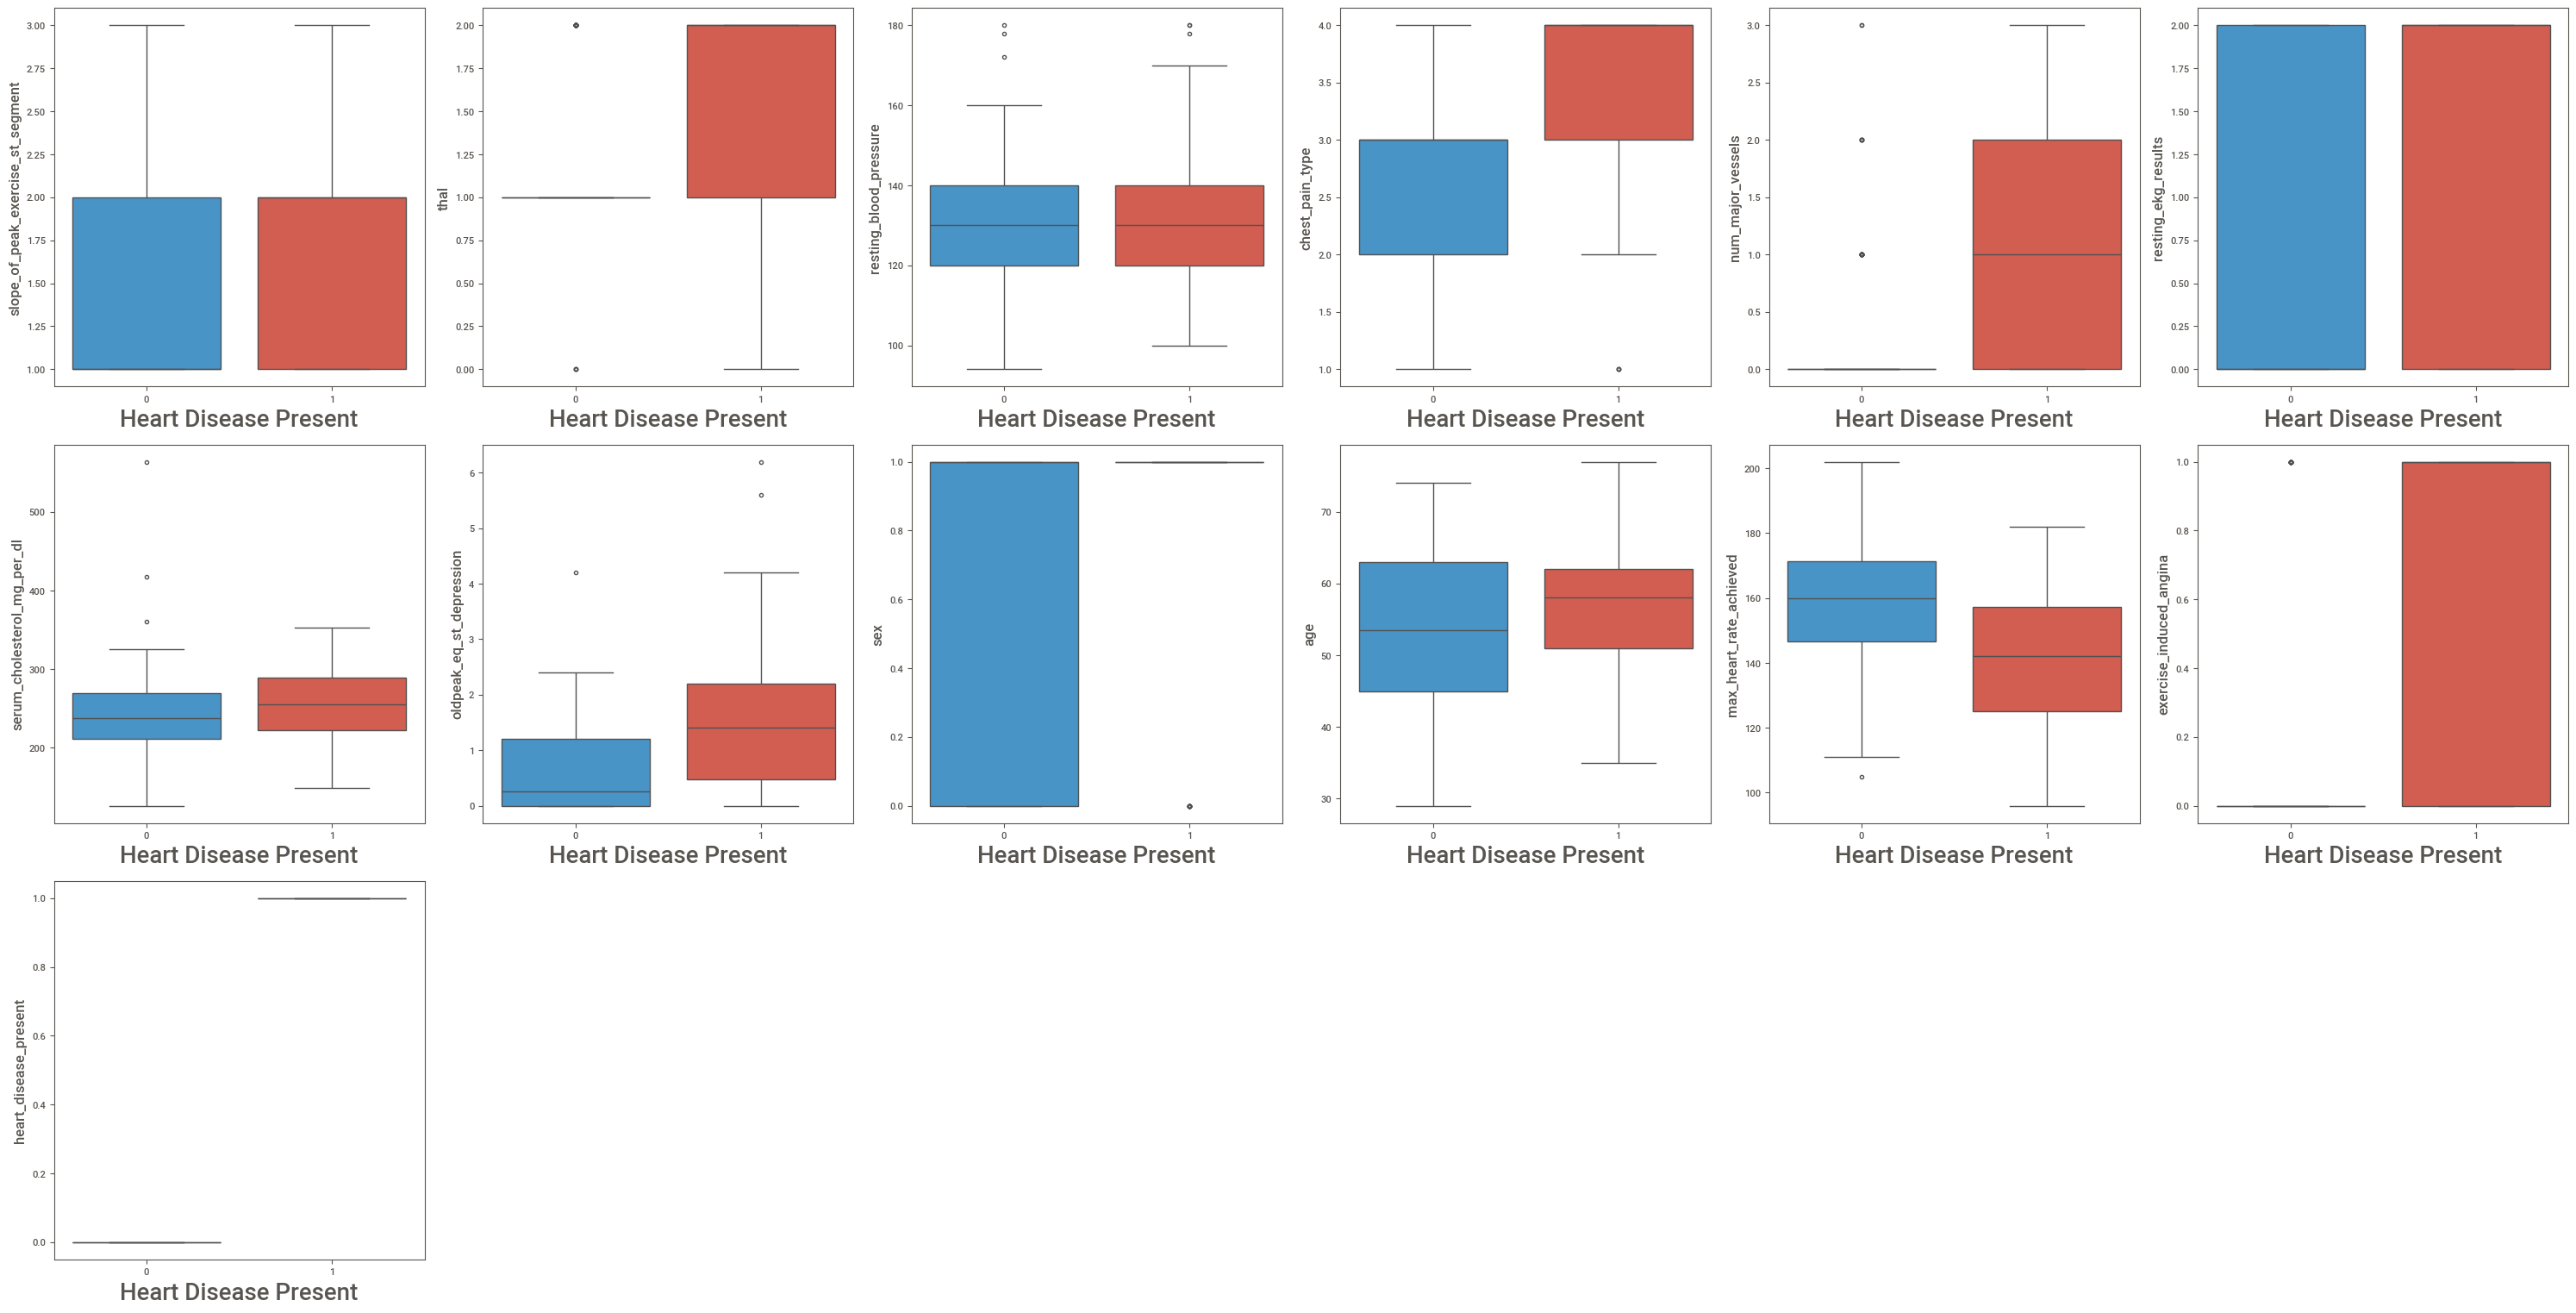

In [53]:
# Set figure size
plt.figure(figsize=(30,30))

# Define a custom color palette
custom_palette = ["#3498db", "#e74c3c"]

# Loop through columns and create boxplot
for i, column in enumerate(df.columns, 1):
    plt.subplot(6,6, i)
    sns.boxplot(x='heart_disease_present', y=column, data=df, palette= custom_palette)
    plt.xlabel('Heart Disease Present', fontsize=20)
    plt.ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()


## Handling Outliers 

## Before Removing the outliers 

In [54]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric_columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define outliers as points that lie outside bounds
outliers = ((df < lower_bound) | (df > upper_bound))


# Count the number of outliers in each column
outliers_count = outliers.sum()

# Sort the columns by the number of outliers in descending order
outliers_count = outliers_count.sort_values(ascending=False)

# Display columns with the highest number of outliers
print(outliers_count)

num_major_vessels                    14
chest_pain_type                      13
resting_blood_pressure                6
oldpeak_eq_st_depression              4
serum_cholesterol_mg_per_dl           2
slope_of_peak_exercise_st_segment     0
thal                                  0
resting_ekg_results                   0
sex                                   0
age                                   0
max_heart_rate_achieved               0
exercise_induced_angina               0
heart_disease_present                 0
dtype: int64


### After Removing the outliers 

In [55]:
for col in df:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

In [56]:
outliers_after = ((df < lower_bound) | (df > upper_bound)).sum()
print(outliers_after)

slope_of_peak_exercise_st_segment    0
thal                                 0
resting_blood_pressure               0
chest_pain_type                      0
num_major_vessels                    0
resting_ekg_results                  0
serum_cholesterol_mg_per_dl          0
oldpeak_eq_st_depression             0
sex                                  0
age                                  0
max_heart_rate_achieved              0
exercise_induced_angina              0
heart_disease_present                0
dtype: int64


<Figure size 3000x3000 with 0 Axes>

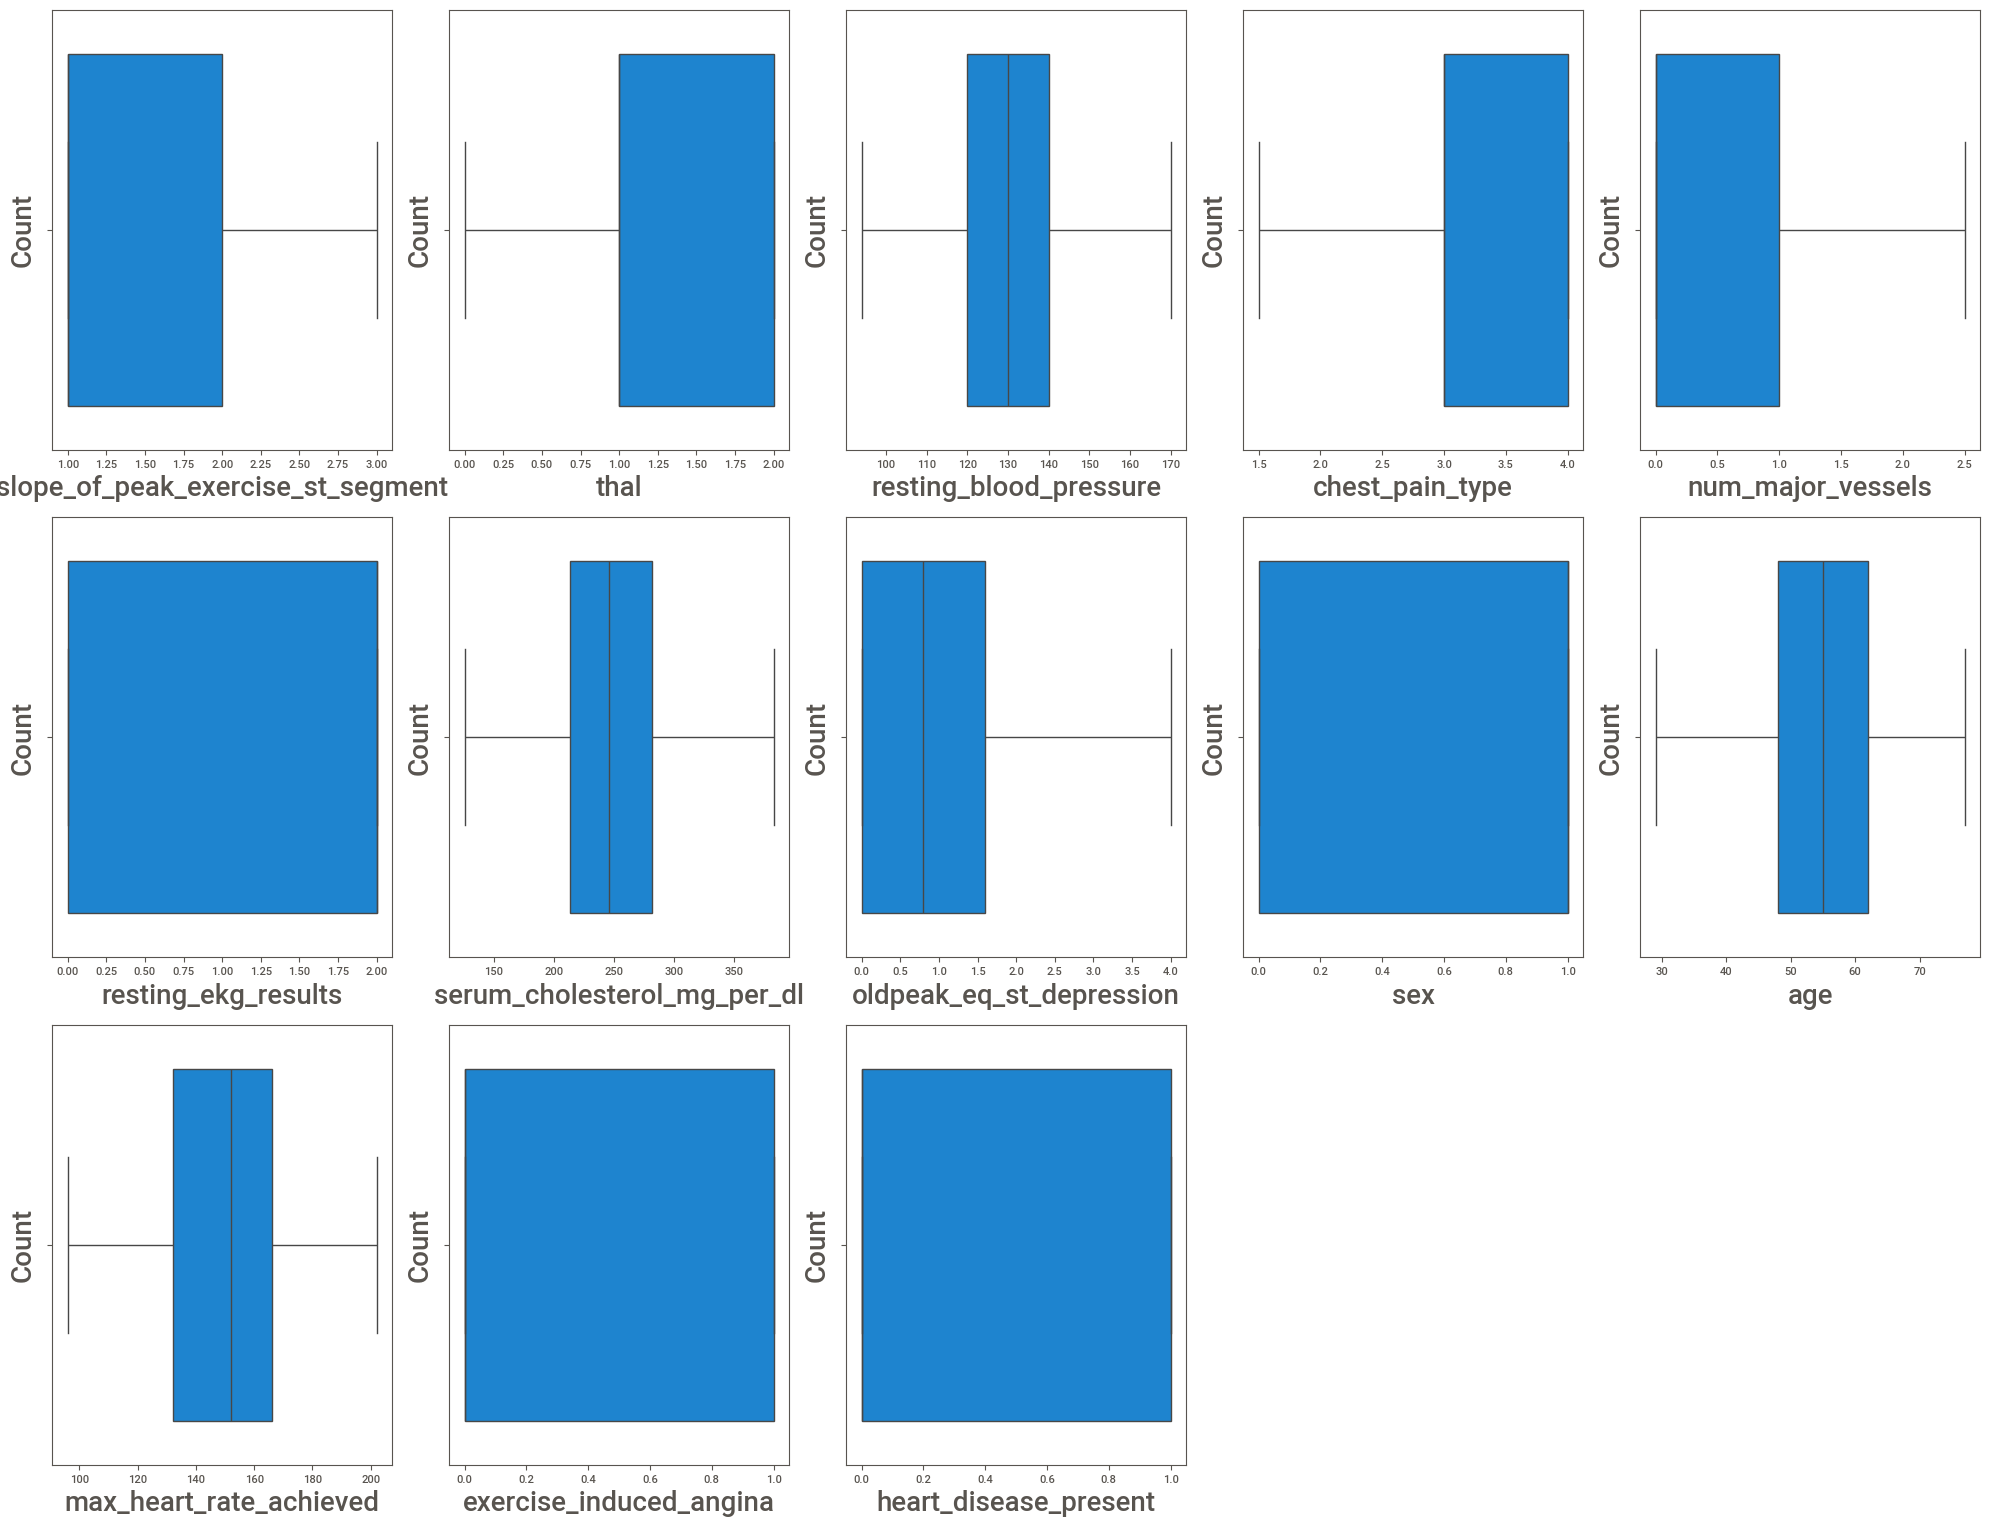

In [57]:
# Set figure size
plt.figure(figsize=(30,30))

# Define a custom color palette
custom_palette = ["#3498db", "#e74c3c"]

## Step 4:-Checking the outliers
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(df[column],orient="h")
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()


# Feature Engineering

In [58]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [59]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1.0,1.0,128.0,2.0,0.0,2.0,308.0,0.0,1.0,45.0,170.0,0.0,0.0
1,2.0,1.0,110.0,3.0,0.0,0.0,214.0,1.6,0.0,54.0,158.0,0.0,0.0
2,1.0,1.0,125.0,4.0,2.5,2.0,304.0,0.0,1.0,77.0,162.0,1.0,1.0
3,1.0,2.0,152.0,4.0,0.0,0.0,223.0,0.0,1.0,40.0,181.0,0.0,1.0
4,3.0,2.0,170.0,1.5,0.0,2.0,270.0,4.0,1.0,59.0,145.0,0.0,0.0


In [60]:
df.shape

(180, 13)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   slope_of_peak_exercise_st_segment  180 non-null    float64
 1   thal                               180 non-null    float64
 2   resting_blood_pressure             180 non-null    float64
 3   chest_pain_type                    180 non-null    float64
 4   num_major_vessels                  180 non-null    float64
 5   resting_ekg_results                180 non-null    float64
 6   serum_cholesterol_mg_per_dl        180 non-null    float64
 7   oldpeak_eq_st_depression           180 non-null    float64
 8   sex                                180 non-null    float64
 9   age                                180 non-null    float64
 10  max_heart_rate_achieved            180 non-null    float64
 11  exercise_induced_angina            180 non-null    float64

## Splitting the data 

In [62]:
predictor = df.iloc[:, :-1]
predictor

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1.0,1.0,128.0,2.0,0.0,2.0,308.0,0.0,1.0,45.0,170.0,0.0
1,2.0,1.0,110.0,3.0,0.0,0.0,214.0,1.6,0.0,54.0,158.0,0.0
2,1.0,1.0,125.0,4.0,2.5,2.0,304.0,0.0,1.0,77.0,162.0,1.0
3,1.0,2.0,152.0,4.0,0.0,0.0,223.0,0.0,1.0,40.0,181.0,0.0
4,3.0,2.0,170.0,1.5,0.0,2.0,270.0,4.0,1.0,59.0,145.0,0.0
5,1.0,1.0,130.0,3.0,0.0,0.0,180.0,0.0,1.0,42.0,150.0,0.0
6,2.0,2.0,150.0,4.0,2.0,2.0,258.0,2.6,0.0,60.0,157.0,0.0
7,2.0,0.0,150.0,4.0,1.0,2.0,276.0,0.6,1.0,57.0,112.0,1.0
8,3.0,2.0,170.0,4.0,0.0,2.0,326.0,3.4,1.0,59.0,140.0,1.0
9,2.0,1.0,120.0,3.0,0.0,0.0,219.0,1.6,0.0,50.0,158.0,0.0


In [63]:
target = df.iloc[:,-1:]
target
target.value_counts()

heart_disease_present
0.0                      100
1.0                       80
Name: count, dtype: int64

# Model Creation

## Train Test split

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictor,target, test_size=0.2, random_state=42)

In [65]:
## Feature Scaling 

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
print(X_train)
print("===============")
print(X_test)

[[-0.83240511  1.13120607 -1.29810197 ... -1.56250303  0.37727483
  -0.69608626]
 [-0.83240511  1.13120607 -0.31878732 ... -2.23115217  0.28642604
   1.43660356]
 [ 0.74478352 -0.62033881 -0.99206614 ... -1.33961998  1.42203589
  -0.69608626]
 ...
 [ 0.74478352  1.13120607 -0.68603031 ... -1.8968276   1.46746028
   1.43660356]
 [-0.83240511 -0.62033881  0.23207717 ... -0.11376322  0.92236755
  -0.69608626]
 [ 0.74478352  1.13120607 -1.29810197 ...  0.44344439 -0.34951548
   1.43660356]]
[[-8.32405113e-01 -6.20338810e-01  2.93284334e-01 -1.41716613e+00
   1.53007504e+00  9.96545926e-01  1.57682794e+00 -9.07103598e-01
  -1.43660356e+00  3.32002872e-01  1.04728464e-01 -6.96086261e-01]
 [-8.32405113e-01 -6.20338810e-01 -1.29810197e+00 -2.47699525e-01
   3.94349238e-01  9.96545926e-01  4.07682379e-01 -9.07103598e-01
  -1.43660356e+00  1.78074268e+00 -8.94608202e-01 -6.96086261e-01]
 [-8.32405113e-01 -6.20338810e-01 -1.17568764e+00  9.21767085e-01
   3.94349238e-01  9.96545926e-01  9.4895347

In [68]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

## Logistic Regression 

In [69]:
classimodel= LogisticRegression(random_state= 102)  
classimodel.fit(X_train, y_train)

trainscore =  classimodel.score(X_train,y_train)
testscore =  classimodel.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')
y_pred =  classimodel.predict(X_test)

#from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

print('f1 score: ',f1_score(y_test, y_pred),'\n')
print('precision score: ',precision_score(y_test, y_pred),'\n')

print(classification_report(y_test, y_pred))
acc_score_lr = accuracy_score(y_test, y_pred)

test score: 0.8611111111111112 train score: 0.8680555555555556 

[[16  0]
 [ 5 15]]
f1 score:  0.8571428571428571 

precision score:  1.0 

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        16
         1.0       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(250):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

trainscore =  rf.score(X_train,y_train)
testscore =  rf.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_pred_rf)

print('f1 score: ',f1_score(y_test, Y_pred_rf),'\n')
print('precision score: ',precision_score(y_test, Y_pred_rf),'\n')

print(classification_report(y_test, Y_pred_rf))
acc_score_rf= accuracy_score(y_test, Y_pred_rf)


test score: 0.8888888888888888 train score: 1.0 

f1 score:  0.888888888888889 

precision score:  1.0 

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        16
         1.0       1.00      0.80      0.89        20

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



## Decision Tree 

In [71]:
# Initialize the maximum accuracy to a very low value
max_accuracy = 0

# Iterate over 250 different random states to find the best one
for x in range(250):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    
    # Calculate the accuracy
    current_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
    
    # Update the best random state and max accuracy if the current one is better
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# After finding the best random state, retrain the model
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Calculate train and test scores
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

# Print train and test scores
print("Test score: {} Train score: {}".format(test_score, train_score), '\n')

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the F1 score and precision score
print('F1 score: ', f1_score(y_test, y_pred), '\n')
print('Precision score: ', precision_score(y_test, y_pred), '\n')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Store the accuracy score for later use
acc_score_dt = accuracy_score(y_test, y_pred)


# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, classification_report
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid
# param_grid = {
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2'],
#     'random_state': [x for x in range(250)]
# }

# # Initialize the GridSearchCV with the DecisionTreeClassifier
# grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the model on the training data
# grid_search.fit(X_train, y_train)

# # Get the best model with the optimal hyperparameters
# best_dt = grid_search.best_estimator_
# print("Best hyperparameters: ", grid_search.best_params_)

# # Train and test scores
# train_score = best_dt.score(X_train, y_train)
# test_score = best_dt.score(X_test, y_test)

# # Print train and test scores
# print("Test score: {} Train score: {}".format(test_score, train_score), '\n')

# # Predictions
# y_pred = best_dt.predict(X_test)

# # Print the confusion matrix
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # Print the F1 score and precision score
# print('F1 score: ', f1_score(y_test, y_pred), '\n')
# print('Precision score: ', precision_score(y_test, y_pred), '\n')

# # Print the classification report
# print("Classification Report:\n", classification_report(y_test, y_pred))

# # Store the accuracy score for later use
# acc_score_dt = accuracy_score(y_test, y_pred)




Test score: 0.8333333333333334 Train score: 1.0 

Confusion Matrix:
 [[16  0]
 [ 6 14]]
F1 score:  0.8235294117647058 

Precision score:  1.0 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      1.00      0.84        16
         1.0       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36



## KNN

In [72]:
knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train, y_train)

trainscore = knnmodel.score(X_train, y_train)
testscore = knnmodel.score(X_test, y_test)

print("test score: {} train score: {}".format(testscore,trainscore),'\n')
y_pred =  knnmodel.predict(X_test)

#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

print('f1 score: ',f1_score(y_test, y_pred),'\n')
print('precision score: ',precision_score(y_test, y_pred),'\n')

print(classification_report(y_test, y_pred))

acc_score_knn= accuracy_score(y_test, y_pred)


test score: 0.8611111111111112 train score: 0.875 

f1 score:  0.8571428571428571 

precision score:  1.0 

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        16
         1.0       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



## Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

NBmodel = GaussianNB()  
NBmodel.fit(X_train, y_train) 

trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')
y_predNB =  NBmodel.predict(X_test)
print(confusion_matrix(y_test, y_predNB))

print("f1_score: ",f1_score(y_test, y_predNB),'\n')
print("precision_score: ",precision_score(y_test, y_predNB),'\n')
print("recall_score: ",recall_score(y_test, y_predNB),'\n')
print(classification_report(y_test, y_predNB))

acc_score_nb= accuracy_score(y_test, y_predNB)



test score: 0.8055555555555556 train score: 0.8541666666666666 

[[16  0]
 [ 7 13]]
f1_score:  0.787878787878788 

precision_score:  1.0 

recall_score:  0.65 

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82        16
         1.0       1.00      0.65      0.79        20

    accuracy                           0.81        36
   macro avg       0.85      0.82      0.80        36
weighted avg       0.86      0.81      0.80        36



## XGBoost

In [74]:
# Define and fit the XGBoost model
XGmodel = xgb.XGBRFClassifier()
XGmodel.fit(X_train, y_train)

# Get training and test scores
trainscore = XGmodel.score(X_train, y_train)
testscore = XGmodel.score(X_test, y_test)
print("Test score: {} Train score: {}".format(testscore, trainscore))

# Predict using the XGBoost model
y_predXG = XGmodel.predict(X_test)

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_predXG)
print("Confusion Matrix:\n", cm)

# Calculate and print F1, Precision, and Recall scores
print("Precision Score:", precision_score(y_test, y_predXG))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_predXG))
print("Accuracy Score:", accuracy_score(y_test, y_predXG))

acc_score_xg= accuracy_score(y_test, y_predXG)


Test score: 0.8055555555555556 Train score: 0.9305555555555556
Confusion Matrix:
 [[15  1]
 [ 6 14]]
Precision Score: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.94      0.81        16
         1.0       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36

Accuracy Score: 0.8055555555555556


## SVM

In [75]:
# svc = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42, probability=True)
# y_pred = svc.predict(X_test)
# svc_acc= round(accuracy_score(y_test,y_pred_svc)*100,2)
# print("SVM Accuracy:", svc_acc)

max_accuracy = 0

for x in range(250):
    svc = SVC(random_state=x)
    svc.fit(X_train,y_train)
    Y_pred_rf = svc.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

svc = SVC(random_state=best_x)
svc.fit(X_train,y_train)
Y_pred_rf = svc.predict(X_test)

trainscore =  svc.score(X_train,y_train)
testscore =  svc.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')
y_pred =  svc.predict(X_test)

#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

print('f1 score: ',f1_score(y_test, y_pred),'\n')
print('precision score: ',precision_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))
acc_score_svc= accuracy_score(y_test, y_pred)



test score: 0.8611111111111112 train score: 0.9305555555555556 

f1 score:  0.8571428571428571 

precision score:  1.0 

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        16
         1.0       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



The accuracy score achieved using Logistic Regression is: 0.8611111111111112 %
The accuracy score achieved using Naive Bayes is: 0.8055555555555556 %
The accuracy score achieved using Support Vector Machine is: 0.8611111111111112 %
The accuracy score achieved using K-Nearest Neighbors is: 0.8611111111111112 %
The accuracy score achieved using Decision Tree is: 0.8333333333333334 %
The accuracy score achieved using Random Forest is: 0.8888888888888888 %
The accuracy score achieved using XGBoost is: 0.8055555555555556 %


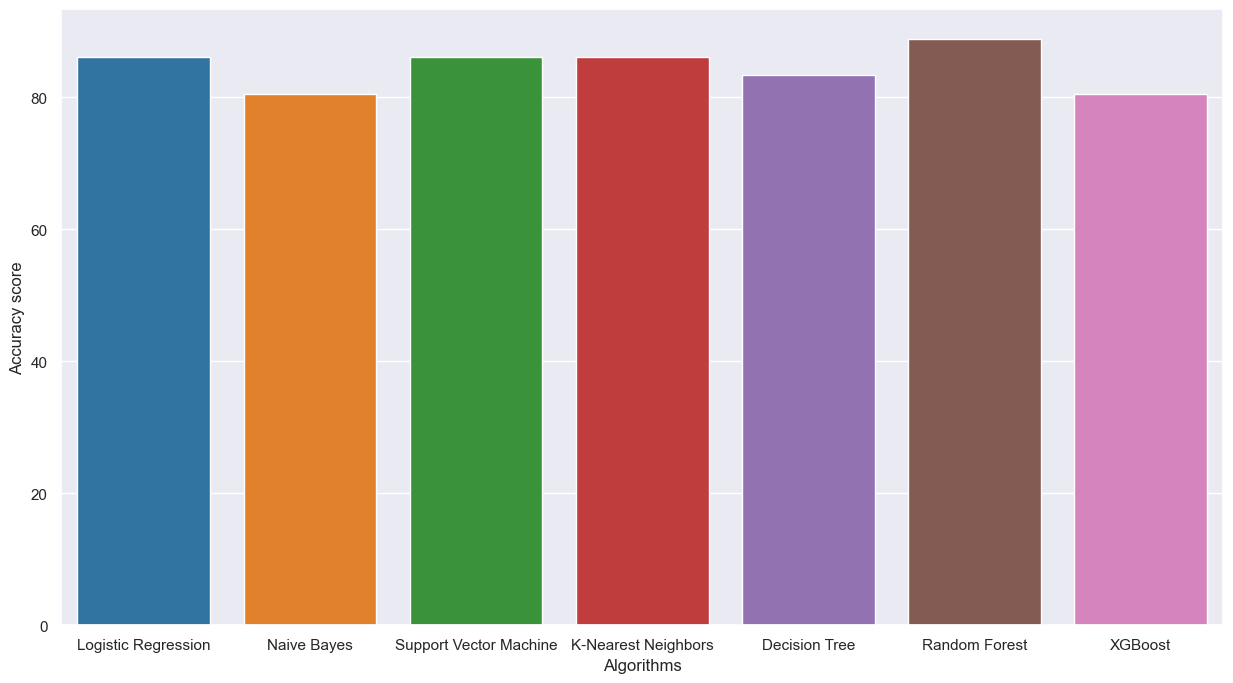

In [76]:
scores = [acc_score_lr,acc_score_nb,acc_score_svc,acc_score_knn,acc_score_dt,acc_score_rf,acc_score_xg]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=[score * 100 for score in scores], palette='tab10')
plt.show()

## Random Forest model gives the best accuracy score amongst all the models used in this project

### Challanges Faced:

#### Data Quality and Preprocessing:
In given data set for the project was not consolidated. The input columns and output columns were present in 2 different csv files which we have to merge before starting the project.
While performing EDA, correct data was not showing in ploting the graph and as same in Heatmap values were not present inside the heatmap.
    
#### Choosing the right Model:
     Deciding whether to use logistic regression, decision trees, or more complex models like random forests or XGBoost was challenging.
     Each model type has its strengths and weaknesses, and the choice depended on the specific characteristics of the dataand the problem.
    
#### Performance Metrics: 
Evaluating model performance was not straightforward due to the imbalanced nature of the data. While accuracy was acommon metric,it was not always the best indicator of model success. More nuanced metrics like precision, recall and  F1-score, were necessary to evaluate
     the model effectively.


### Conclusion:

The heart disease prediction project aimed to develop a model to accurately predict the presence of heart disease based on various clinical features.
After exploring and analyzing the dataset, which included key variables such as resting blood pressure, cholesterol levels, and ECG results, 
several machine learning algorithms were applied, including Logistic Regression, Naive Bayes, Support Vector Machine, K-Nearest Neighbors, 
Decision Tree, Random Forest, XGBoost, and Neural Network.

The models were evaluated based on their accuracy scores, with performance ranging across different algorithms. Key findings indicate that some 
algorithms, particularly ensemble methods like Random Forest and XGBoost, provided superior accuracy compared to others. These results highlight
the importance of model selection and tuning in medical prediction tasks.

The project successfully identified the most significant predictors of heart disease, and the final model can be used as a tool for early detection,
potentially guiding preventive measures and improving patient outcomes.